In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split


dataset=pd.read_csv(r'C:\Users\Bhavya Shah\Downloads\machinelearning_lecture-master\machinelearning_lecture-master\Lecture 2\data_classification.csv')
dataset

C:\Users\Bhavya Shah\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,no of hours studied,no of hours slept,pass
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
5,1.922270,1.331427,0
6,8.978216,0.993438,1
7,6.635603,8.542803,1
8,7.672359,5.416400,1
9,4.866015,2.042671,0


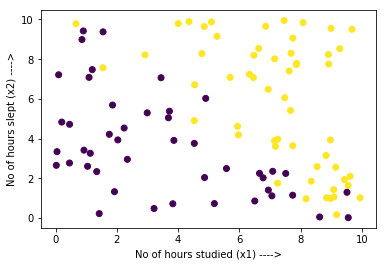

[5.70052911 9.94784093 5.09102909 5.58106113 9.43820269 6.86140497
 0.86040708 7.69192306 1.75344854 6.47790044 1.13248839 6.46089606
 7.86385017 8.08197371 7.87439057 4.86601533 1.54910163 9.620465
 2.99191148 0.09805288]
[7.08354423 1.02645781 9.87313409 2.49612929 1.94381244 9.65530971
 8.98818814 8.29822782 4.2192426  8.19818055 3.26491181 7.07629269
 7.72638337 9.84220681 7.79109336 2.04267129 9.37513216 2.09932754
 5.29921046 7.21451254]
[1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0]


In [5]:
x1=dataset['no of hours studied'].values
x2=dataset['no of hours slept'].values
y=dataset['pass'].values

plt.scatter(x1,x2,c=y)
plt.xlabel('No of hours studied (x1) ---->')
plt.ylabel('No of hours slept (x2) ---->')
plt.show()

x1_train,x1_test,x2_train,x2_test,y_train,y_test=train_test_split(x1,x2,y,test_size=0.2)

print(x1_test)
print(x2_test)
print(y_test)

In [19]:
no_iterations=1000
learning_rate=0.001

def sigmoid(x):
    return(1/(1+np.exp(-x)))
# a+bx1+cx2
a=0
b=0
c=0
N=len(x1_train)

def hypothesis(x1_train,x2_train,y_train,a,b,c):
    hyp=0
    hyp=a+b*x1+c*x2
    return(sigmoid(hyp))

def cost_function(x1_train,x2_train,y_train):
    hyp=hypothesis(x1_train,x2_train,y_train,a,b,c)
    error=0    
    for i in range(0,N):
        error+=(y_train-hyp[i])**2
    error/=N

def gradient_descent(x1_train,x2_train,y_train,a,b,c,learning_rate):
    a_gradient=0
    b_gradient=0
    c_gradient=0
    hyp=hypothesis(x1_train,x2_train,y_train,a,b,c)
    for i in range(0,N):
        a_gradient+=(-2/N)*(y_train[i]-hyp[i])
        b_gradient+=(-2/N)*(y_train[i]-hyp[i])*(x1_train[i])
        c_gradient+=(-2/N)*(y_train[i]-hyp[i])*(x2_train[i])
    a_new=a-(learning_rate*a_gradient)
    b_new=b-(learning_rate*b_gradient)
    c_new=c-(learning_rate*c_gradient)
    return[a_new,b_new,c_new]

for i in range(0,no_iterations):
    a,b,c=gradient_descent(x1_train,x2_train,y_train,a,b,c,learning_rate)
print(a)
print(b)
print(c)
y_predict=a+b*x1_test[-1]+c*x2_test[-1]
print(sigmoid(y_predict))
print(y_test)
if(sigmoid(y_predict)>=0.5):
    print("PASS")
else:
    print("FAIL")

-0.273180329627681
0.19295398579342757
0.0009440153160062883
0.4384512338474249
[1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0]
FAIL
